In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import argparse
import matplotlib.pyplot as plt

In [2]:
import sys
sys.argv=['']
del sys

In [3]:
from data_loader import load_data_matrix, load_data
from model import get_similarity, predict, MatrixFactorization, NeuralNetwork
from train import train
from args import args_mf, args_nn

In [10]:
train_data_matrix, test_data_matrix = load_data_matrix(0.3)
similarity = get_similarity(train_data_matrix, sim_type = 'cosine', cf_type = 'user')
cf_prediction = predict(train_data_matrix, similarity, cf_type = 'user')

Loading data...


In [12]:
data_info_mf = load_data(args_mf)
mf_info = train(args_mf, data_info_mf,model_type = 'mf')
mf_prediction = mf_info[3]

loading data ...
splitting dataset ...
epoch 0    train loss: 4.1670  rmse: 2.0408    val loss: 4.2291  rmse: 2.0563    test loss: 4.2652  rmse: 2.0651
epoch 10    train loss: 1.5709  rmse: 1.2530    val loss: 1.7447  rmse: 1.3208    test loss: 1.7588  rmse: 1.3261
epoch 20    train loss: 1.1742  rmse: 1.0833    val loss: 1.3578  rmse: 1.1652    test loss: 1.3802  rmse: 1.1747
epoch 30    train loss: 1.0258  rmse: 1.0125    val loss: 1.2219  rmse: 1.1053    test loss: 1.2407  rmse: 1.1138
epoch 40    train loss: 0.9487  rmse: 0.9737    val loss: 1.1514  rmse: 1.0729    test loss: 1.1638  rmse: 1.0787
epoch 50    train loss: 0.9035  rmse: 0.9502    val loss: 1.1166  rmse: 1.0566    test loss: 1.1298  rmse: 1.0628
epoch 60    train loss: 0.8740  rmse: 0.9346    val loss: 1.0891  rmse: 1.0435    test loss: 1.1005  rmse: 1.0490
epoch 70    train loss: 0.8529  rmse: 0.9232    val loss: 1.0699  rmse: 1.0343    test loss: 1.0811  rmse: 1.0397
epoch 80    train loss: 0.8348  rmse: 0.9133    va

In [5]:
data_info = load_data(args_nn)
nn_info = train(args_nn, data_info, model_type = 'nn')
nn_prediction = nn_info[3]

loading data ...
splitting dataset ...
epoch 0    train loss: 16.8467  rmse: 4.1044    val loss: 16.7003  rmse: 4.0866    test loss: 16.7572  rmse: 4.0935
epoch 1    train loss: 15.1562  rmse: 3.8930    val loss: 15.0321  rmse: 3.8771    test loss: 15.0774  rmse: 3.8829
epoch 2    train loss: 13.7432  rmse: 3.7070    val loss: 13.6371  rmse: 3.6928    test loss: 13.6733  rmse: 3.6977
epoch 3    train loss: 12.5508  rmse: 3.5426    val loss: 12.4595  rmse: 3.5298    test loss: 12.4885  rmse: 3.5339
epoch 4    train loss: 11.5243  rmse: 3.3946    val loss: 11.4456  rmse: 3.3831    test loss: 11.4687  rmse: 3.3865
epoch 5    train loss: 10.6162  rmse: 3.2581    val loss: 10.5486  rmse: 3.2478    test loss: 10.5666  rmse: 3.2506
epoch 6    train loss: 9.8228  rmse: 3.1340    val loss: 9.7645  rmse: 3.1248    test loss: 9.7783  rmse: 3.1270
epoch 7    train loss: 9.1108  rmse: 3.0183    val loss: 9.0610  rmse: 3.0101    test loss: 9.0711  rmse: 3.0118
epoch 8    train loss: 8.5074  rmse: 2.

In [49]:
def get_criterion(prediction, ground_truth, thres):

    binary_prediction = prediction >= thres
    binary_prediction = (1 * binary_prediction.reshape(1,-1)).tolist()[0]
    
    binary_real = ground_truth >= thres
    binary_real = (1 * binary_real.reshape(1,-1)).tolist()[0]

    TP = sum([int(x+y==2) for x,y in zip(binary_prediction, binary_real)])
    FP = sum([int(x-y==1) for x,y in zip(binary_prediction, binary_real)])
    TN = sum([int(x+y==0) for x,y in zip(binary_prediction, binary_real)])
    FN = sum([int(y-x==1) for x,y in zip(binary_prediction, binary_real)])
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    #TPR = recall
    #FPR = FP / (FP + TN)
    
    return precision, recall#, TPR, FPR

In [56]:
def plot_criterion(prediction, ground_truth, thres_range, plot_type, color = 'red'):
    
    precision_ls, recall_ls, tpr_ls, fpr_ls = [],[],[],[]
    
    for thres in thres_range:
        precision, recall = get_criterion(prediction, ground_truth, thres = thres)
        
        precision_ls.append(precision)
        recall_ls.append(recall)
        #tpr_ls.append(tpr)
        #fpr_ls.append(fpr)
    
    if plot_type == "PR":
        plt.plot(recall_ls,precision_ls,color = color)
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("P-R Curve")
    else:
        plt.plot(fpr_ls, tpr_ls, color = color)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")

   
    return None

In [8]:
THRES_RANGE = [0.01] + np.arange(0.05,2.6,0.05).tolist()

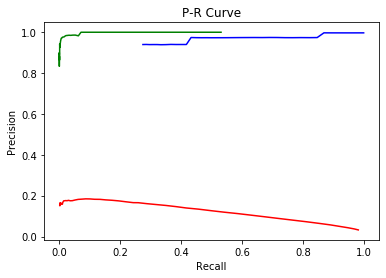

In [57]:
plt.figure()
plot_criterion(cf_prediction,test_data_matrix,thres_range = THRES_RANGE,plot_type = 'PR',color = 'red')
plot_criterion(mf_prediction,data_info_mf[4][:,2],thres_range = THRES_RANGE,plot_type = 'PR',color = 'green')
plot_criterion(nn_prediction,data_info[4],thres_range = THRES_RANGE,plot_type = 'PR',color = 'blue')
plt.show()